In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import  mean_squared_error

In [4]:
sns.set_style('darkgrid')

datos = pd.read_csv('./dataset_Facebook.csv')

In [5]:
datos.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [6]:
nuevo = datos[['Total Interactions','Post Weekday','like','Post Hour']]
nuevo.head()

,Total Interactions,Post Weekday,like,Post Hour
0,100,4,79.0,3
1,164,3,130.0,10
2,80,3,66.0,3
3,1777,2,1572.0,10
4,393,2,325.0,3


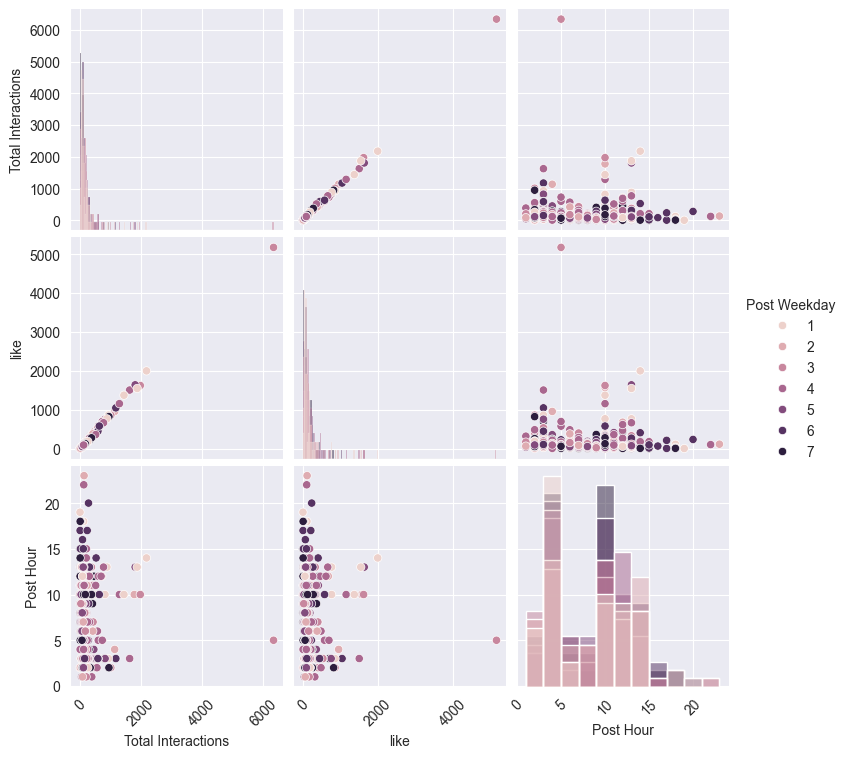

In [7]:
g= sns.pairplot(nuevo,hue='Post Weekday',diag_kind='hist')
for ax in g.axes.flat:
  plt.setp(ax.get_xticklabels(),rotation=45)

In [8]:
datos = datos.replace(np.nan,'0')
share = datos['share'].values
hour = datos['Post Hour'].values
days = datos['Post Weekday'].values
likes = datos['like'].values
interaction = datos['Total Interactions'].values

In [10]:
x = np.array([hour,days,interaction]).T
y = np.array(likes)

reg = LinearRegression()
reg = reg.fit(x,y)

y_pred = reg.predict(x)
error = np.sqrt(mean_squared_error(y,y_pred))
r2 = reg.score(x,y)
print('El error es: ', error)
print('El error de r^2 es: ',r2)
print('Los coeficientes son:\n',reg.coef_)

El error es:  21.819538679152522
El error de r^2 es:  0.9954323615919498
Los coeficientes son:
 [ 0.21551007 -0.40017767  0.84787796]


In [11]:
hour=17
days=1
interaction=150
print('Likes de la prediccion:\n',reg.predict([[hour,days,interaction]]))

Likes de la prediccion:
 [128.15445304]
